In [1]:
import numpy as np
import pandas as pd
import pymatgen.core as mg
from math import gcd
import statistics
from statistics import mean
from statistics import mode
import statistics as stat
import matplotlib.pyplot as plt
import math

from pymatgen.ext.matproj import MPRester
import tensorflow as tf
from tensorflow.keras import layers
from tabulate import tabulate

import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline 

from pylab import cm
import matplotlib as mpl

import matplotlib.font_manager as fm

mpl.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2


In [118]:
metals = ['Li','Be','Na','Mg','Al','K','Ca','Sc','Ti','V','Cr','Mn','Fe','Co','Ni','Cu','Zn','Ga','Rb','Sr','Y','Zr',
         'Nb','Mo','Ru','Rh','Pd','Ag','Cd','In','Sn','Cs','Ba','Hf','Ta','W','Re','Os','Ir','Pt','Au','Hg',
         'Tl','Pb','Bi','La','Ce','Pr','Nd',
          'Sm','Eu','Gd','Tb','Dy','Ho','Er','Tm','Yb','Lu','Th']
#length is 60
print(len(metals)) 
print(metals.index('La'))

60
45


In [119]:
#edited list:
pnoxides = ['Li2O','Na2O','Al2O3','K2O','CaO','V2O5','Cr2O3','Mn2O3','BeO','MgO','Sc2O3','TiO2','Fe2O3','Co3O4','NiO','CuO','ZnO','Ga2O3','Rb2O','SrO','Y2O3',
            'ZrO2', 'Nb2O5','MoO3','RuO2','Rh2O3','PdO','AgO','CdO','In2O3','SnO2','Cs2O','BaO','HfO2','Ta2O5','WO3','Re2O7','OsO2','IrO2','PtO','Au2O3','HgO'
            ,'Tl2O3','PbO2','Bi2O3','La2O3','CeO2','Pr6O11','Nd2O3','Sm2O3','Eu2O3','Gd2O3','Tb4O6','Dy2O3','Ho2O3','Er2O3','Tm2O3','Yb2O3','Lu2O3','ThO2'
            ,'UO2']

In [120]:
#initialize MPRester

with MPRester('te6LPIwzrup9SZsT') as mpr: 
    
    cff = ((mpr.query('mp-1216634',['unit_cell_formula']))[0])['unit_cell_formula']

In [121]:
#Get alloy or reactant coefficients, given alloy 'AB' material id

#ternary compound coefficients function 
    #pf = pretty formula
    #cf = chemical formula
    #RAc = reactant A coefficient
    #RBc = reactant B coefficient
    
    #rAc and rBc are the coefficients of the reactants from the unit cell formula
    #used to calculate RAc and RBc.


def bccf(pf):
    cf = ((mpr.query(pf,['unit_cell_formula']))[0])['unit_cell_formula']

    rAc = int(list(cf.values())[0])

    rBc = int(list(cf.values())[1])

    RAc = rAc/gcd(rAc,rBc)

    RBc = rBc/gcd(rAc,rBc)

    return RAc, RBc

#Retrieve coefficients

#RAc = list(bccf(id))[0] 

#RBc = list(bccf(id))[1] 

#RCc = list(bccf(id))[2] 




In [122]:
#Alloy constituent names used to search for constituent oxides

def names(id):
    cf = ((mpr.query(id,['unit_cell_formula']))[0])['unit_cell_formula']
    A = (list(cf.keys())[0])
    B = (list(cf.keys())[1])
    return A,B

#A = list(names(id))[0] 

#B = list(names(id))[1] 

#C = list(names(id))[1] 

In [123]:
#list of superconductors and their T_c values
b = [ ['AgBi2',2.87],['Ag2F',.066],['Ag7FO8',.3],['Ag4Ge',.85],['AgIn2',2.4],['AgLa',.94],['AgLu',.33],['Ag7No11',1.04],['Ag4Sn',.01],['AgTe3',2.6],['AgTh',2.2],['AgTh2',2.26],['AgY',.33],['AlAu4',.4],['Al2Au',.1],['AlGe2',1.75],['AlLa3',5.57],['Al2La',3.23],['Al2Lu',1.02],['Al3Mg2',.84],['AlMo3',.58],['AlN',1.55],['Al3Nb',.64],['AlOs',.39],['Al3Os',5.9],['Al2Pt',.48],['Al5Re24',3.35],['AlSb',2.8],['Al2Sc',1.02],['AlTh2',.1],['Al3Th',.75],['Al2Y',.35],['Al3Yb',.94],['AlZr3',.73],['As4La3',.6],['AsNb3',.3],['AsPb',.4],['AsPd5',1.9],['AsRh',.58],['AsSn',4.1],['AsV3',.2],['Au5Ba',.4],['AuBe',2.64],['Au2Bi',1.8],['Au5Ca',.34],['AuGa2',1.6],['AuGa',1.2],['AuIn2',.2],['AuIn',.4],['AuNb3',1.2],['AuPb2',3.15],['AuPb3',4.4],['Au2Pb',1.18],['AuSb2',.58],['AuSn',1.25],['Au5Sn',.7],['Au3Te5',1.62],['AuTh2',3.08],['AuTl',1.92],['AuV3',.74],['AuZn3',1.21],['AuZr3',.92],['BCMo2',5.4],['BHf',3.1],['B6La',5.7],['B12Lu',.48],['BMo',.5],['BMo2',4.74],['BNb',8.25],['BRe2',2.8],['B12Sc',.39],['BTa',4],['BTa2',3.12],['B6Th',.74],['BW2',3.1],['B6Y',6.5],['B12Y',4.7],['BZr',3.4],['B12Zr',5.82],['BaBi3',5.69],['BaRh2',6],['Be22Mo',2.51],['BeTc',5.21],['Be22W',4.12],['Be13W',4.1],['Bi3Ca',2],['BiCo',4.2],['Bi2Cs',4.75],['BiCu',1.33],['Bi3In5',4.1],['BiIn2',5.65],['Bi2Ir',1.7],['BiK',3.6],['Bi2K',3.58],['BiLi',2.47],['Bi3Mo',3],['BiNa',2.25],['BiNb3',4.5],['BiNi',4.25],['Bi3Ni',4.06],['Bi2Pb',4.25],['BiPd2',4],['BiPd',3.7],['Bi2Pd',1.7],['BiPt',1.21],['Bi2Rb',4.25],['BiRe2',1.9],['BiRh',2.06],['BiRu',5.7],['Bi3Sn',3.6],['Bi3Sr',5.62],['BiSn',3.8],['Bi5Tl3',6.4],['Bi2Y3',2.25],['Bi3Zn',.8]       ]                                                     
b_high =  [  ['AlNb3',12],['AlV3',11.8],['AuNb3',11.5],['GaNb3',14.5],['GaV3',16.8],['InLa3',9.83],['InV3',13.9],['Mo3Os',12.7],['Mo3Re',10],['MoRu',9.5],['Mo3Ru',10.6],['Mo3Tc',15],['Nb3Pt',10.9],['Nb3Sn',18.05],['Nb3Sn2',16.6],['PbTa3',17],['RhTa3',10],['RhZr2',10.8] ]


In [124]:
#bbhigh = []
#for item in b_high:
#    try:
#        print(bccf(item[0]))
#        bbhigh.append(item)
#    except:
    
#        print(item)

In [125]:
#bb = []
#for item in b:
#    try:
#        print(bccf(item[0]))
#        bb.append(item)
#    except:
    
#        print(item)

In [126]:
#bb = bbhigh + bb

In [127]:
#bbb = []
#for item in bb:
#    n = names(item[0])
#    if n[0] in metals and n[1] in metals:
#        bbb.append(item)

In [128]:
bbb = [['AlNb3', 12], ['AlV3', 11.8], ['AuNb3', 11.5], ['GaNb3', 14.5], ['GaV3', 16.8], ['InLa3', 9.83], ['Mo3Os', 12.7], ['Mo3Re', 10], ['MoRu', 9.5], ['Nb3Pt', 10.9], ['Nb3Sn', 18.05], ['PbTa3', 17], ['RhZr2', 10.8], ['AlNb3', 12], ['AlV3', 11.8], ['AuNb3', 11.5], ['GaNb3', 14.5], ['GaV3', 16.8], ['InLa3', 9.83], ['Mo3Os', 12.7], ['Mo3Re', 10], ['MoRu', 9.5], ['Nb3Pt', 10.9], ['Nb3Sn', 18.05], ['PbTa3', 17], ['RhZr2', 10.8], ['AlNb3', 12], ['AlV3', 11.8], ['AuNb3', 11.5], ['GaNb3', 14.5], ['GaV3', 16.8], ['InLa3', 9.83], ['Mo3Os', 12.7], ['Mo3Re', 10], ['MoRu', 9.5], ['Nb3Pt', 10.9], ['Nb3Sn', 18.05], ['PbTa3', 17], ['RhZr2', 10.8], ['AgIn2', 2.4], ['AgLa', 0.94], ['AgTh2', 2.26], ['AgY', 0.33], ['AlAu4', 0.4], ['Al2Au', 0.1], ['AlLa3', 5.57], ['Al2La', 3.23], ['Al2Lu', 1.02], ['AlMo3', 0.58], ['Al3Nb', 0.64], ['AlOs', 0.39], ['Al2Pt', 0.48], ['Al5Re24', 3.35], ['Al2Sc', 1.02], ['AlTh2', 0.1], ['Al3Th', 0.75], ['Al2Y', 0.35], ['Al3Yb', 0.94], ['AlZr3', 0.73], ['Au5Ba', 0.4], ['AuBe', 2.64], ['Au2Bi', 1.8], ['Au5Ca', 0.34], ['AuGa2', 1.6], ['AuGa', 1.2], ['AuIn2', 0.2], ['AuNb3', 1.2], ['AuPb2', 3.15], ['AuPb3', 4.4], ['Au2Pb', 1.18], ['AuSn', 1.25], ['Au5Sn', 0.7], ['AuTh2', 3.08], ['AuV3', 0.74], ['AuZn3', 1.21], ['AuZr3', 0.92], ['BaBi3', 5.69], ['BaRh2', 6], ['Be22Mo', 2.51], ['Be22W', 4.12], ['Be13W', 4.1], ['Bi3Ca', 2], ['Bi2Cs', 4.75], ['BiCu', 1.33], ['Bi3In5', 4.1], ['BiIn2', 5.65], ['Bi2Ir', 1.7], ['BiK', 3.6], ['Bi2K', 3.58], ['BiLi', 2.47], ['Bi3Mo', 3], ['BiNa', 2.25], ['BiNb3', 4.5], ['BiNi', 4.25], ['Bi3Ni', 4.06], ['BiPd', 3.7], ['Bi2Pd', 1.7], ['BiPt', 1.21], ['Bi2Rb', 4.25], ['BiRh', 2.06], ['Bi3Sn', 3.6], ['Bi3Sr', 5.62], ['BiSn', 3.8], ['Bi3Zn', 0.8]]


In [129]:
#oxide metal and oxegyn coefficients given oxide

#PAc = product A oxide metal coefficient given oxide materials id

#PBc = product B oxide metal coefficient given oxide materials id

#PAOc = product A oxide oxegyn coefficient given oxide materials id

#PAOc = product B oxide oxegyn coefficient given oxide materials id

#now take oxide and reactant coefficients to calculate reaction coefficients

#cMA = coefficient matrix A

#cMB = coefficient matrix B

#cL = coefficient list

   

def metric(alloy):
    N = names(alloy)
    A = N[0]
    B = N[1]
    C = N[2]
    
    def findox(AorB):
        for item in pnoxides:
            if len(AorB) == 2: 
                if item[0]+item[1] == AorB:
                    AorBox = item
                    return AorBox
            elif len(AorB) == 1: 
                if item[0] == AorB:
                    AorBox = item
                    return AorBox
            
                
    Pa = findox(A)
    PA = list(bccf(Pa))
    
    PAc = PA[0]
    PAOc = PA[1]
    
    Pb = findox(B)
    PB = list(bccf(Pb))
    
    PBc = PB[0]
    PBOc = PB[1] 
    
    Pc = findox(C)
    PC = list(bccf(Pc))
    
    PCc = PC[0]
    PCOc = PC[1] 
    
    Rcoeffs = tccf(alloy)
    
    RAc = Rcoeffs[0]
    RBc = Rcoeffs[1]
    RCc = Rcoeffs[2]
    
    
    cMA = np.zeros((4,4))
    cMB = np.zeros((4,1))

    cMA[0][0] = RAc
    cMA[0][1] = -1*PAc

    cMA[1][0] = RBc
    cMA[1][2] = -1*PBc
    
    cMA[2][0] = RCc
    cMA[2][3] = -1*PCc
    
    cMA[3][1] = PAOc
    cMA[3][2] = PBOc
    cMA[3][3] = PCOc
    
    cMB[3][0] = 2
    
    cL = np.linalg.solve(cMA,cMB)
    
    x = cL[0][0]
    y = cL[1][0]
    z = cL[2][0]
    w = cL[3][0]
    
    alloyid = mpr.query(alloy, ['materials_id'])
    
    
    def metricpart(Pa,Pb,Pc,alloy,x,y,z,w,PAOc,PBOc,PCOc,PAc,PBc,PCc):
            natomsA = PAOc + PAc
            natomsB = PBOc + PBc
            natomsC = PCOc + PCc
    
            eAlloy = mpr.query(criteria={'pretty_formula': alloy},properties = ['formation_energy_per_atom'])[0]['formation_energy_per_atom']*(RAc+RBc+RCc)
            eA = mpr.query(criteria={'pretty_formula': Pa},properties = ['formation_energy_per_atom'])[0]['formation_energy_per_atom']*natomsA
            eB = mpr.query(criteria={'pretty_formula': Pb},properties = ['formation_energy_per_atom'])[0]['formation_energy_per_atom']*natomsB
            eC = mpr.query(criteria={'pretty_formula': Pc},properties = ['formation_energy_per_atom'])[0]['formation_energy_per_atom']*natomsC

    
            Eref = y*eA + z*eB+w*eC
            Erxn5 = Eref - x*eAlloy 
    
            metric = Erxn5/Eref
        
            return metric
    
    m = metricpart(Pa,Pb,Pc,alloy,x,y,z,w,PAOc,PBOc,PCOc,PAc,PBc,PCc)
    return m
    
    

In [130]:
alloy_m = bbb 

In [131]:
#alloy_m_old = [['AgIn2', 2.4], ['AgLa', 0.94], ['AgTh2', 2.26], ['AgY', 0.33], ['AlAu4', 0.4], ['Al2Au', 0.1], ['AlLa3', 5.57], ['Al2La', 3.23], ['Al2Lu', 1.02], ['AlMo3', 0.58], ['Al3Nb', 0.64], ['AlOs', 0.39], ['Al2Pt', 0.48], ['Al5Re24', 3.35], ['Al2Sc', 1.02], ['AlTh2', 0.1], ['Al3Th', 0.75], ['Al2Y', 0.35], ['Al3Yb', 0.94], ['AlZr3', 0.73], ['Au5Ba', 0.4], ['AuBe', 2.64], ['Au2Bi', 1.8], ['Au5Ca', 0.34], ['AuGa2', 1.6], ['AuGa', 1.2], ['AuIn2', 0.2], ['AuNb3', 1.2], ['AuPb2', 3.15], ['AuPb3', 4.4], ['Au2Pb', 1.18], ['AuSn', 1.25], ['Au5Sn', 0.7], ['AuTh2', 3.08], ['AuV3', 0.74], ['AuZn3', 1.21], ['AuZr3', 0.92], ['BaBi3', 5.69], ['BaRh2', 6], ['Be22Mo', 2.51], ['Be22W', 4.12], ['Be13W', 4.1], ['Bi3Ca', 2], ['Bi2Cs', 4.75], ['BiCu', 1.33], ['Bi3In5', 4.1], ['BiIn2', 5.65], ['Bi2Ir', 1.7], ['BiK', 3.6], ['Bi2K', 3.58], ['BiLi', 2.47], ['Bi3Mo', 3], ['BiNa', 2.25], ['BiNb3', 4.5], ['BiNi', 4.25], ['Bi3Ni', 4.06], ['BiPd', 3.7], ['Bi2Pd', 1.7], ['BiPt', 1.21], ['Bi2Rb', 4.25], ['BiRh', 2.06], ['Bi3Sn', 3.6], ['Bi3Sr', 5.62], ['BiSn', 3.8], ['Bi3Zn', 0.8]]


In [132]:
atomic_property_list = [[92.906372, 5017.0, 8.57, 2750.0, 41, 'Nb', 88.516, 1.6, 640], [24.305, 1363.0, 1.738, 923.0, 12, 'Mg', -40.0, 1.31, 737], [87.621, 1650.0, 2.64, 1050.0, 38, 'Sr', 5.023, 0.95, 403], [164.930332, 2873.0, 8.79, 1734.0, 67, 'Ho', 32.61, 1.23, 573], [9.01218315, 2742.0, 1.85, 1560.0, 4, 'Be', -48.0, 1.57, 899], [168.934222, 2223.0, 9.32, 1818.0, 69, 'Tm', 99.0, 1.25, 589], [107.86822, 2435.0, 10.49, 1234.93, 47, 'Ag', 125.862, 1.93, 804], [195.0849, 4098.0, 21.45, 2041.4, 78, 'Pt', 205.041, 2.28, 880], [106.421, 3236.0, 12.023, 1828.05, 46, 'Pd', 54.24, 2.2, 719], [88.905842, 3203.0, 4.472, 1799.0, 39, 'Y', 29.6, 1.22, 549], [150.362, 2173.0, 7.52, 1345.0, 62, 'Sm', 15.63, 1.17, 533], [196.9665695, 3243.0, 19.3, 1337.33, 79, 'Au', 222.747, 2.54, 870], [40.0784, 1757.0, 1.55, 1115.0, 20, 'Ca', 2.37, 1.0, 589], [238.028913, 4404.0, 19.1, 1405.3, 92, 'U', 50.94, 1.38, 899], [151.9641, 1802.0, 5.264, 1099.0, 63, 'Eu', 11.2, 1.2, 544], [50.94151, 3680.0, 6.0, 2183.0, 23, 'V', 50.911, 1.63, 650], [144.2423, 3347.0, 7.01, 1297.0, 60, 'Nd', 184.87, 1.14, 527], [173.0451, 1469.0, 6.9, 1097.0, 70, 'Yb', -1.93, 1.1, 596], [140.1161, 3716.0, 6.77, 1068.0, 58, 'Ce', 55.0, 1.12, 538], [51.99616, 2944.0, 7.19, 2180.0, 24, 'Cr', 65.21, 1.66, 652], [157.253, 3273.0, 7.9, 1585.0, 64, 'Gd', 13.22, 1.2, 547], [183.841, 6203.0, 19.25, 3695.0, 74, 'W', 78.76, 2.36, 761], [102.905502, 3968.0, 12.41, 2237.0, 45, 'Rh', 110.27, 2.28, 710], [132.905451966, 944.0, 1.93, 301.7, 55, 'Cs', 45.505, 0.79, 708], [69.7231, 2673.0, 5.91, 302.9146, 31, 'Ga', 41.0, 1.81, 578], [180.947882, 5731.0, 16.69, 3290.0, 73, 'Ta', 31.0, 1.5, 658], [178.492, 4876.0, 13.31, 2506.0, 72, 'Hf', 17.18, 1.3, 523], [91.2242, 4650.0, 6.52, 2128.0, 40, 'Zr', 41.806, 1.33, 600], [95.951, 4912.0, 10.28, 2896.0, 42, 'Mo', 72.1, 2.16, 652], [162.5001, 2840.0, 8.54, 1680.0, 66, 'Dy', 33.96, 1.22, 565], [6.94, 1603.0, 0.534, 453.65, 3, 'Li', 59.6326, 0.98, 520], [232.03774, 5061.0, 11.724, 2023.0, 90, 'Th', 112.72, 1.3, 703], [174.96681, 3675.0, 9.841, 1925.0, 71, 'Lu', 33.4, 1.27, 603], [39.09831, 1032.0, 0.862, 336.7, 19, 'K', 48.383, 0.82, 418], [63.5463, 2835.0, 8.96, 1357.77, 29, 'Cu', 119.235, 1.9, 745], [204.38, 1746.0, 11.85, 577.0, 81, 'Tl', 36.4, 1.62, 1007], [190.233, 5285.0, 22.59, 3306.0, 76, 'Os', 103.99, 2.2, 760], [137.3277, 2118.0, 3.51, 1000.0, 56, 'Ba', 13.954, 0.89, 375], [22.989769282, 1156.09, 0.968, 370.944, 11, 'Na', 52.867, 0.93, 495], [114.8181, 2345.0, 7.31, 429.7485, 49, 'In', 37.043, 1.78, 867], [54.9380443, 2334.0, 7.21, 1519.0, 25, 'Mn', -50.0, 1.55, 717], [58.9331944, 3200.0, 8.9, 1768.0, 27, 'Co', 63.898, 1.88, 760], [44.9559085, 3109.0, 2.985, 1814.0, 21, 'Sc', 18.0, 1.36, 633], [118.7107, 2875.0, 7.365, 505.08, 50, 'Sn', 107.2984, 1.96, 558], [208.980401, 1837.0, 9.78, 544.7, 83, 'Bi', 90.924, 2.02, 715], [55.8452, 3134.0, 7.874, 1811.0, 26, 'Fe', 14.785, 1.83, 762], [186.2071, 5869.0, 21.02, 3459.0, 75, 'Re', 5.8273, 1.9, 770], [101.072, 4423.0, 12.45, 2607.0, 44, 'Ru', 100.96, 2.2, 684], [58.69344, 3003.0, 8.908, 1728.0, 28, 'Ni', 111.65, 1.91, 737], [26.98153857, 2743.0, 2.7, 933.47, 13, 'Al', 41.762, 1.61, 577], [47.8671, 3560.0, 4.506, 1941.0, 22, 'Ti', 7.289, 1.54, 658], [65.382, 1180.0, 7.14, 692.68, 30, 'Zn', -58.0, 1.65, 906], [85.46783, 961.0, 1.532, 312.45, 37, 'Rb', 46.884, 0.82, 762], [112.4144, 1040.0, 8.65, 594.22, 48, 'Cd', -68.0, 1.69, 731], [138.905477, 3737.0, 6.162, 1193.0, 57, 'La', 53.0, 1.1, 502], [140.907662, 3403.0, 6.77, 1208.0, 59, 'Pr', 93.0, 1.13, 534], [158.925352, 3396.0, 8.23, 1629.0, 65, 'Tb', 112.4, 1.1, 593], [167.2593, 3141.0, 9.066, 1802.0, 68, 'Er', 30.1, 1.24, 581], [192.2173, 4403.0, 22.56, 2719.0, 77, 'Ir', 150.94, 2.2, 840], [200.5923, 629.88, 13.534, 234.321, 80, 'Hg', -48.0, 2.0, 890], [207.21, 2022.0, 11.34, 600.61, 82, 'Pb', 34.4204, 1.87, 589]]

In [133]:
#labeled_dataframe = []
#for item in alloy_m:
#    l = []
#    n = names(item[0])
#    n1 = n[0]
#    n2 = n[1]
#    l.append(item[0])
#    for j in atomic_property_list:
#        if j[5] == n1:
#            ll = [j[0],j[4]]
#            l.append(ll)
#    for j in atomic_property_list:
#        if j[5] == n2:
 #           ll = [j[0],j[4]]
#            l.append(ll)

#    labeled_dataframe.append(l)
            
            

In [134]:
labeled_dataframe = [['AlNb3', [92.906372, 41], [26.98153857, 13]], ['AlV3', [26.98153857, 13], [50.94151, 23]], ['AuNb3', [92.906372, 41], [196.9665695, 79]], ['GaNb3', [92.906372, 41], [69.7231, 31]], ['GaV3', [50.94151, 23], [69.7231, 31]], ['InLa3', [138.905477, 57], [114.8181, 49]], ['Mo3Os', [95.951, 42], [190.233, 76]], ['Mo3Re', [186.2071, 75], [95.951, 42]], ['MoRu', [95.951, 42], [101.072, 44]], ['Nb3Pt', [92.906372, 41], [195.0849, 78]], ['Nb3Sn', [92.906372, 41], [118.7107, 50]], ['PbTa3', [180.947882, 73], [207.21, 82]], ['RhZr2', [91.2242, 40], [102.905502, 45]], ['AgIn2', [114.8181, 49], [107.86822, 47]], ['AgLa', [138.905477, 57], [107.86822, 47]], ['AgTh2', [232.03774, 90], [107.86822, 47]], ['AgY', [88.905842, 39], [107.86822, 47]], ['AlAu4', [26.98153857, 13], [196.9665695, 79]], ['Al2Au', [26.98153857, 13], [196.9665695, 79]], ['AlLa3', [138.905477, 57], [26.98153857, 13]], ['Al2La', [138.905477, 57], [26.98153857, 13]], ['Al2Lu', [174.96681, 71], [26.98153857, 13]], ['AlMo3', [26.98153857, 13], [95.951, 42]], ['Al3Nb', [92.906372, 41], [26.98153857, 13]], ['AlOs', [26.98153857, 13], [190.233, 76]], ['Al2Pt', [26.98153857, 13], [195.0849, 78]], ['Al5Re24', [26.98153857, 13], [186.2071, 75]], ['Al2Sc', [44.9559085, 21], [26.98153857, 13]], ['AlTh2', [232.03774, 90], [26.98153857, 13]], ['Al3Th', [232.03774, 90], [26.98153857, 13]], ['Al2Y', [88.905842, 39], [26.98153857, 13]], ['Al3Yb', [173.0451, 70], [26.98153857, 13]], ['AlZr3', [91.2242, 40], [26.98153857, 13]], ['Au5Ba', [137.3277, 56], [196.9665695, 79]], ['AuBe', [9.01218315, 4], [196.9665695, 79]], ['Au2Bi', [208.980401, 83], [196.9665695, 79]], ['Au5Ca', [40.0784, 20], [196.9665695, 79]], ['AuGa2', [69.7231, 31], [196.9665695, 79]], ['AuGa', [69.7231, 31], [196.9665695, 79]], ['AuIn2', [114.8181, 49], [196.9665695, 79]], ['AuNb3', [92.906372, 41], [196.9665695, 79]], ['AuPb2', [207.21, 82], [196.9665695, 79]], ['AuPb3', [207.21, 82], [196.9665695, 79]], ['Au2Pb', [207.21, 82], [196.9665695, 79]], ['AuSn', [118.7107, 50], [196.9665695, 79]], ['Au5Sn', [118.7107, 50], [196.9665695, 79]], ['AuTh2', [232.03774, 90], [196.9665695, 79]], ['AuV3', [50.94151, 23], [196.9665695, 79]], ['AuZn3', [65.382, 30], [196.9665695, 79]], ['AuZr3', [91.2242, 40], [196.9665695, 79]], ['BaBi3', [137.3277, 56], [208.980401, 83]], ['BaRh2', [137.3277, 56], [102.905502, 45]], ['Be22Mo', [9.01218315, 4], [95.951, 42]], ['Be22W', [9.01218315, 4], [183.841, 74]], ['Be13W', [9.01218315, 4], [183.841, 74]], ['Bi3Ca', [40.0784, 20], [208.980401, 83]], ['Bi2Cs', [132.905451966, 55], [208.980401, 83]], ['BiCu', [63.5463, 29], [208.980401, 83]], ['Bi3In5', [114.8181, 49], [208.980401, 83]], ['BiIn2', [114.8181, 49], [208.980401, 83]], ['Bi2Ir', [208.980401, 83], [192.2173, 77]], ['BiK', [39.09831, 19], [208.980401, 83]], ['Bi2K', [39.09831, 19], [208.980401, 83]], ['BiLi', [6.94, 3], [208.980401, 83]], ['Bi3Mo', [208.980401, 83], [95.951, 42]], ['BiNa', [22.989769282, 11], [208.980401, 83]], ['BiNb3', [92.906372, 41], [208.980401, 83]], ['BiNi', [58.69344, 28], [208.980401, 83]], ['Bi3Ni', [58.69344, 28], [208.980401, 83]], ['BiPd', [208.980401, 83], [106.421, 46]], ['Bi2Pd', [208.980401, 83], [106.421, 46]], ['BiPt', [208.980401, 83], [195.0849, 78]], ['Bi2Rb', [85.46783, 37], [208.980401, 83]], ['BiRh', [208.980401, 83], [102.905502, 45]], ['Bi3Sn', [118.7107, 50], [208.980401, 83]], ['Bi3Sr', [87.621, 38], [208.980401, 83]], ['BiSn', [118.7107, 50], [208.980401, 83]], ['Bi3Zn', [65.382, 30], [208.980401, 83]]]
print(len(labeled_dataframe))

78


In [135]:
#labeled_dataframe_old = [['AgIn2', [114.8181, 49], [107.86822, 47]], ['AgLa', [138.905477, 57], [107.86822, 47]], ['AgTh2', [232.03774, 90], [107.86822, 47]], ['AgY', [88.905842, 39], [107.86822, 47]], ['AlAu4', [26.98153857, 13], [196.9665695, 79]], ['Al2Au', [26.98153857, 13], [196.9665695, 79]], ['AlLa3', [138.905477, 57], [26.98153857, 13]], ['Al2La', [138.905477, 57], [26.98153857, 13]], ['Al2Lu', [174.96681, 71], [26.98153857, 13]], ['AlMo3', [26.98153857, 13], [95.951, 42]], ['Al3Nb', [92.906372, 41], [26.98153857, 13]], ['AlOs', [26.98153857, 13], [190.233, 76]], ['Al2Pt', [26.98153857, 13], [195.0849, 78]], ['Al5Re24', [26.98153857, 13], [186.2071, 75]], ['Al2Sc', [44.9559085, 21], [26.98153857, 13]], ['AlTh2', [232.03774, 90], [26.98153857, 13]], ['Al3Th', [232.03774, 90], [26.98153857, 13]], ['Al2Y', [88.905842, 39], [26.98153857, 13]], ['Al3Yb', [173.0451, 70], [26.98153857, 13]], ['AlZr3', [91.2242, 40], [26.98153857, 13]], ['Au5Ba', [137.3277, 56], [196.9665695, 79]], ['AuBe', [9.01218315, 4], [196.9665695, 79]], ['Au2Bi', [208.980401, 83], [196.9665695, 79]], ['Au5Ca', [40.0784, 20], [196.9665695, 79]], ['AuGa2', [69.7231, 31], [196.9665695, 79]], ['AuGa', [69.7231, 31], [196.9665695, 79]], ['AuIn2', [114.8181, 49], [196.9665695, 79]], ['AuNb3', [92.906372, 41], [196.9665695, 79]], ['AuPb2', [207.21, 82], [196.9665695, 79]], ['AuPb3', [207.21, 82], [196.9665695, 79]], ['Au2Pb', [207.21, 82], [196.9665695, 79]], ['AuSn', [118.7107, 50], [196.9665695, 79]], ['Au5Sn', [118.7107, 50], [196.9665695, 79]], ['AuTh2', [232.03774, 90], [196.9665695, 79]], ['AuV3', [50.94151, 23], [196.9665695, 79]], ['AuZn3', [65.382, 30], [196.9665695, 79]], ['AuZr3', [91.2242, 40], [196.9665695, 79]], ['BaBi3', [137.3277, 56], [208.980401, 83]], ['BaRh2', [137.3277, 56], [102.905502, 45]], ['Be22Mo', [9.01218315, 4], [95.951, 42]], ['Be22W', [9.01218315, 4], [183.841, 74]], ['Be13W', [9.01218315, 4], [183.841, 74]], ['Bi3Ca', [40.0784, 20], [208.980401, 83]], ['Bi2Cs', [132.905451966, 55], [208.980401, 83]], ['BiCu', [63.5463, 29], [208.980401, 83]], ['Bi3In5', [114.8181, 49], [208.980401, 83]], ['BiIn2', [114.8181, 49], [208.980401, 83]], ['Bi2Ir', [208.980401, 83], [192.2173, 77]], ['BiK', [39.09831, 19], [208.980401, 83]], ['Bi2K', [39.09831, 19], [208.980401, 83]], ['BiLi', [6.94, 3], [208.980401, 83]], ['Bi3Mo', [208.980401, 83], [95.951, 42]], ['BiNa', [22.989769282, 11], [208.980401, 83]], ['BiNb3', [92.906372, 41], [208.980401, 83]], ['BiNi', [58.69344, 28], [208.980401, 83]], ['Bi3Ni', [58.69344, 28], [208.980401, 83]], ['BiPd', [208.980401, 83], [106.421, 46]], ['Bi2Pd', [208.980401, 83], [106.421, 46]], ['BiPt', [208.980401, 83], [195.0849, 78]], ['Bi2Rb', [85.46783, 37], [208.980401, 83]], ['BiRh', [208.980401, 83], [102.905502, 45]], ['Bi3Sn', [118.7107, 50], [208.980401, 83]], ['Bi3Sr', [87.621, 38], [208.980401, 83]], ['BiSn', [118.7107, 50], [208.980401, 83]], ['Bi3Zn', [65.382, 30], [208.980401, 83]]]

In [136]:
#dataframe = []
#for item in labeled_dataframe: 
#    l = []
#    l.append(item[1][0])
#    l.append(item[1][1])
#    l.append(item[2][0])
#    l.append(item[2][1])
#    l.append(1)
 #   dataframe.append(l)

In [137]:
dataframe = [[92.906372, 41, 26.98153857, 13, 1], [26.98153857, 13, 50.94151, 23, 1], [92.906372, 41, 196.9665695, 79, 1], [92.906372, 41, 69.7231, 31, 1], [50.94151, 23, 69.7231, 31, 1], [138.905477, 57, 114.8181, 49, 1], [95.951, 42, 190.233, 76, 1], [186.2071, 75, 95.951, 42, 1], [95.951, 42, 101.072, 44, 1], [92.906372, 41, 195.0849, 78, 1], [92.906372, 41, 118.7107, 50, 1], [180.947882, 73, 207.21, 82, 1], [91.2242, 40, 102.905502, 45, 1], [114.8181, 49, 107.86822, 47, 1], [138.905477, 57, 107.86822, 47, 1], [232.03774, 90, 107.86822, 47, 1], [88.905842, 39, 107.86822, 47, 1], [26.98153857, 13, 196.9665695, 79, 1], [26.98153857, 13, 196.9665695, 79, 1], [138.905477, 57, 26.98153857, 13, 1], [138.905477, 57, 26.98153857, 13, 1], [174.96681, 71, 26.98153857, 13, 1], [26.98153857, 13, 95.951, 42, 1], [92.906372, 41, 26.98153857, 13, 1], [26.98153857, 13, 190.233, 76, 1], [26.98153857, 13, 195.0849, 78, 1], [26.98153857, 13, 186.2071, 75, 1], [44.9559085, 21, 26.98153857, 13, 1], [232.03774, 90, 26.98153857, 13, 1], [232.03774, 90, 26.98153857, 13, 1], [88.905842, 39, 26.98153857, 13, 1], [173.0451, 70, 26.98153857, 13, 1], [91.2242, 40, 26.98153857, 13, 1], [137.3277, 56, 196.9665695, 79, 1], [9.01218315, 4, 196.9665695, 79, 1], [208.980401, 83, 196.9665695, 79, 1], [40.0784, 20, 196.9665695, 79, 1], [69.7231, 31, 196.9665695, 79, 1], [69.7231, 31, 196.9665695, 79, 1], [114.8181, 49, 196.9665695, 79, 1], [92.906372, 41, 196.9665695, 79, 1], [207.21, 82, 196.9665695, 79, 1], [207.21, 82, 196.9665695, 79, 1], [207.21, 82, 196.9665695, 79, 1], [118.7107, 50, 196.9665695, 79, 1], [118.7107, 50, 196.9665695, 79, 1], [232.03774, 90, 196.9665695, 79, 1], [50.94151, 23, 196.9665695, 79, 1], [65.382, 30, 196.9665695, 79, 1], [91.2242, 40, 196.9665695, 79, 1], [137.3277, 56, 208.980401, 83, 1], [137.3277, 56, 102.905502, 45, 1], [9.01218315, 4, 95.951, 42, 1], [9.01218315, 4, 183.841, 74, 1], [9.01218315, 4, 183.841, 74, 1], [40.0784, 20, 208.980401, 83, 1], [132.905451966, 55, 208.980401, 83, 1], [63.5463, 29, 208.980401, 83, 1], [114.8181, 49, 208.980401, 83, 1], [114.8181, 49, 208.980401, 83, 1], [208.980401, 83, 192.2173, 77, 1], [39.09831, 19, 208.980401, 83, 1], [39.09831, 19, 208.980401, 83, 1], [6.94, 3, 208.980401, 83, 1], [208.980401, 83, 95.951, 42, 1], [22.989769282, 11, 208.980401, 83, 1], [92.906372, 41, 208.980401, 83, 1], [58.69344, 28, 208.980401, 83, 1], [58.69344, 28, 208.980401, 83, 1], [208.980401, 83, 106.421, 46, 1], [208.980401, 83, 106.421, 46, 1], [208.980401, 83, 195.0849, 78, 1], [85.46783, 37, 208.980401, 83, 1], [208.980401, 83, 102.905502, 45, 1], [118.7107, 50, 208.980401, 83, 1], [87.621, 38, 208.980401, 83, 1], [118.7107, 50, 208.980401, 83, 1], [65.382, 30, 208.980401, 83, 1]]


In [138]:
#dataframe_old = [[114.8181, 49, 107.86822, 47, 1], [138.905477, 57, 107.86822, 47, 1], [232.03774, 90, 107.86822, 47, 1], [88.905842, 39, 107.86822, 47, 1], [26.98153857, 13, 196.9665695, 79, 1], [26.98153857, 13, 196.9665695, 79, 1], [138.905477, 57, 26.98153857, 13, 1], [138.905477, 57, 26.98153857, 13, 1], [174.96681, 71, 26.98153857, 13, 1], [26.98153857, 13, 95.951, 42, 1], [92.906372, 41, 26.98153857, 13, 1], [26.98153857, 13, 190.233, 76, 1], [26.98153857, 13, 195.0849, 78, 1], [26.98153857, 13, 186.2071, 75, 1], [44.9559085, 21, 26.98153857, 13, 1], [232.03774, 90, 26.98153857, 13, 1], [232.03774, 90, 26.98153857, 13, 1], [88.905842, 39, 26.98153857, 13, 1], [173.0451, 70, 26.98153857, 13, 1], [91.2242, 40, 26.98153857, 13, 1], [137.3277, 56, 196.9665695, 79, 1], [9.01218315, 4, 196.9665695, 79, 1], [208.980401, 83, 196.9665695, 79, 1], [40.0784, 20, 196.9665695, 79, 1], [69.7231, 31, 196.9665695, 79, 1], [69.7231, 31, 196.9665695, 79, 1], [114.8181, 49, 196.9665695, 79, 1], [92.906372, 41, 196.9665695, 79, 1], [207.21, 82, 196.9665695, 79, 1], [207.21, 82, 196.9665695, 79, 1], [207.21, 82, 196.9665695, 79, 1], [118.7107, 50, 196.9665695, 79, 1], [118.7107, 50, 196.9665695, 79, 1], [232.03774, 90, 196.9665695, 79, 1], [50.94151, 23, 196.9665695, 79, 1], [65.382, 30, 196.9665695, 79, 1], [91.2242, 40, 196.9665695, 79, 1], [137.3277, 56, 208.980401, 83, 1], [137.3277, 56, 102.905502, 45, 1], [9.01218315, 4, 95.951, 42, 1], [9.01218315, 4, 183.841, 74, 1], [9.01218315, 4, 183.841, 74, 1], [40.0784, 20, 208.980401, 83, 1], [132.905451966, 55, 208.980401, 83, 1], [63.5463, 29, 208.980401, 83, 1], [114.8181, 49, 208.980401, 83, 1], [114.8181, 49, 208.980401, 83, 1], [208.980401, 83, 192.2173, 77, 1], [39.09831, 19, 208.980401, 83, 1], [39.09831, 19, 208.980401, 83, 1], [6.94, 3, 208.980401, 83, 1], [208.980401, 83, 95.951, 42, 1], [22.989769282, 11, 208.980401, 83, 1], [92.906372, 41, 208.980401, 83, 1], [58.69344, 28, 208.980401, 83, 1], [58.69344, 28, 208.980401, 83, 1], [208.980401, 83, 106.421, 46, 1], [208.980401, 83, 106.421, 46, 1], [208.980401, 83, 195.0849, 78, 1], [85.46783, 37, 208.980401, 83, 1], [208.980401, 83, 102.905502, 45, 1], [118.7107, 50, 208.980401, 83, 1], [87.621, 38, 208.980401, 83, 1], [118.7107, 50, 208.980401, 83, 1], [65.382, 30, 208.980401, 83, 1]]

In [139]:
bbb = [['AlNb3', 12], ['AlV3', 11.8], ['GaNb3', 14.5], ['GaV3', 16.8], ['InLa3', 9.83], ['Mo3Os', 12.7], ['Mo3Re', 10], ['Nb3Pt', 10.9], ['Nb3Sn', 18.05], ['RhZr2', 10.8], ['AuNb3', 11.5], ['MoRu', 9.5], ['PbTa3', 17], ['AgIn2', 2.4], ['AgLa', 0.94], ['AgTh2', 2.26], ['AgY', 0.33], ['AlAu4', 0.4], ['Al2Au', 0.1], ['AlLa3', 5.57], ['Al2La', 3.23], ['Al2Lu', 1.02], ['AlMo3', 0.58], ['Al3Nb', 0.64], ['AlOs', 0.39], ['Al2Pt', 0.48], ['Al5Re24', 3.35], ['Al2Sc', 1.02], ['AlTh2', 0.1], ['Al3Th', 0.75], ['Al2Y', 0.35], ['Al3Yb', 0.94], ['AlZr3', 0.73], ['Au5Ba', 0.4], ['AuBe', 2.64], ['Au2Bi', 1.8], ['Au5Ca', 0.34], ['AuGa2', 1.6], ['AuGa', 1.2], ['AuIn2', 0.2], ['AuPb2', 3.15], ['AuPb3', 4.4], ['Au2Pb', 1.18], ['AuSn', 1.25], ['Au5Sn', 0.7], ['AuTh2', 3.08], ['AuV3', 0.74], ['AuZn3', 1.21], ['AuZr3', 0.92], ['BaBi3', 5.69], ['BaRh2', 6], ['Be22Mo', 2.51], ['Be22W', 4.12], ['Be13W', 4.1], ['Bi3Ca', 2], ['Bi2Cs', 4.75], ['BiCu', 1.33], ['Bi3In5', 4.1], ['BiIn2', 5.65], ['Bi2Ir', 1.7], ['BiK', 3.6], ['Bi2K', 3.58], ['BiLi', 2.47], ['Bi3Mo', 3], ['BiNa', 2.25], ['BiNb3', 4.5], ['BiNi', 4.25], ['Bi3Ni', 4.06], ['BiPd', 3.7], ['Bi2Pd', 1.7], ['BiPt', 1.21], ['Bi2Rb', 4.25], ['BiRh', 2.06], ['Bi3Sn', 3.6], ['Bi3Sr', 5.62], ['BiSn', 3.8], ['Bi3Zn', 0.8]]


In [140]:
#bbba = []
#for item in bbb:
#    bbba.append(item[0])
#labeled_dataframea = []
#for item in labeled_dataframe:
#    labeled_dataframea.append(item[0])

#for item in labeled_dataframea:
#    if item not in bbba: 
#        print(item)
        
#Tc = []
#for item in labeled_dataframea:
#    c = bbba.index(item)
#    Tc.append(bbb[c][1])

In [141]:
df = pd.DataFrame(dataframe, columns = ['Atomic_Mass_1','Number_1','Atomic_Mass_2','Number_2','Target']    )    

In [142]:
print(df)

    Atomic_Mass_1  Number_1  Atomic_Mass_2  Number_2  Target
0       92.906372        41      26.981539        13       1
1       26.981539        13      50.941510        23       1
2       92.906372        41     196.966569        79       1
3       92.906372        41      69.723100        31       1
4       50.941510        23      69.723100        31       1
..            ...       ...            ...       ...     ...
73     208.980401        83     102.905502        45       1
74     118.710700        50     208.980401        83       1
75      87.621000        38     208.980401        83       1
76     118.710700        50     208.980401        83       1
77      65.382000        30     208.980401        83       1

[78 rows x 5 columns]


In [143]:
def df_to_dataset(dataframe, shuffle=True, batch_size=32): #32?
  df = dataframe.copy()
  labels = df.pop('Target')
  df = {key: value[:,tf.newaxis] for key, value in dataframe.items()}
  ds = tf.data.Dataset.from_tensor_slices((dict(df), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  ds = ds.prefetch(batch_size)
  return ds

In [144]:
batch_size = 5


In [145]:
dss = df_to_dataset(df, batch_size=batch_size)


/var/folders/hg/lmrgn_wd51qgqpzl4868_npw0000gn/T/ipykernel_99744/3086363061.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df = {key: value[:,tf.newaxis] for key, value in dataframe.items()}


In [146]:
print(dss)

<PrefetchDataset element_spec=({'Atomic_Mass_1': TensorSpec(shape=(None, 1), dtype=tf.float64, name=None), 'Number_1': TensorSpec(shape=(None, 1), dtype=tf.int64, name=None), 'Atomic_Mass_2': TensorSpec(shape=(None, 1), dtype=tf.float64, name=None), 'Number_2': TensorSpec(shape=(None, 1), dtype=tf.int64, name=None), 'Target': TensorSpec(shape=(None, 1), dtype=tf.int64, name=None)}, TensorSpec(shape=(None,), dtype=tf.int64, name=None))>


In [147]:
#Tc  = [2.4, 0.94, 2.26, 0.33, 0.4, 0.1, 5.57, 3.23, 1.02, 0.58, 0.64, 0.39, 0.48, 3.35, 1.02, 0.1, 0.75, 0.35, 0.94, 0.73, 0.4, 2.64, 1.8, 0.34, 1.6, 1.2, 0.2, 1.2, 3.15, 4.4, 1.18, 1.25, 0.7, 3.08, 0.74, 1.21, 0.92, 5.69, 6, 2.51, 4.12, 4.1, 2, 4.75, 1.33, 4.1, 5.65, 1.7, 3.6, 3.58, 2.47, 3, 2.25, 4.5, 4.25, 4.06, 3.7, 1.7, 1.21, 4.25, 2.06, 3.6, 5.62, 3.8, 0.8]

In [1]:
pred_metrics = [1.004945158958435, 1.0088893175125122, 1.0036711692810059, 1.0036357641220093, 1.0032191276550293, 1.0022821426391602, 1.0065081119537354, 1.006417989730835, 1.0055214166641235, 1.0065081119537354, 1.0071139335632324, 0.9972808361053467, 1.006104588508606, 1.007535457611084, 1.0029979944229126, 0.997937023639679, 1.0067015886306763, 1.007295846939087, 1.0050603151321411, 1.0043272972106934, 1.0073753595352173, 1.008583426475525, 1.006069302558899, 1.0074074268341064, 1.0018054246902466, 1.0046216249465942, 1.0015705823898315, 1.003318190574646, 1.001771330833435, 1.0031272172927856, 1.0071139335632324, 1.0062474012374878, 1.0068477392196655, 1.003753662109375, 1.0062223672866821, 1.0055570602416992, 1.004464030265808, 1.0041329860687256, 1.0057592391967773, 0.9998885989189148, 1.0038871765136719, 1.0074074268341064, 0.9998885989189148, 1.006714940071106, 1.0045825242996216, 1.0056073665618896, 1.007554054260254, 1.00637948513031, 1.006412148475647, 1.004945158958435, 0.9972808361053467, 0.9980019927024841, 1.0115225315093994, 1.0088893175125122, 1.006417989730835, 1.0032232999801636, 1.0032072067260742, 1.0055570602416992, 1.0024237632751465, 0.9988980889320374, 1.0045886039733887, 1.004945158958435, 1.002630591392517, 1.0045053958892822, 1.006131649017334, 1.0029617547988892, 1.0083800554275513, 1.0052164793014526, 1.0032072067260742, 1.006069302558899, 1.0049371719360352, 1.0076494216918945, 1.0045053958892822, 1.0049371719360352, 1.0058364868164062, 1.0022821426391602, 1.0081874132156372, 1.0022794008255005]


In [4]:
Tc = [12, 11.8, 11.5, 14.5, 16.8, 9.83, 12.7, 10, 9.5, 10.9, 18.05, 17, 10.8, 2.4, 0.94, 2.26, 0.33, 0.4, 0.1, 5.57, 3.23, 1.02, 0.58, 0.64, 0.39, 0.48, 3.35, 1.02, 0.1, 0.75, 0.35, 0.94, 0.73, 0.4, 2.64, 1.8, 0.34, 1.6, 1.2, 0.2, 11.5, 3.15, 4.4, 1.18, 1.25, 0.7, 3.08, 0.74, 1.21, 0.92, 5.69, 6, 2.51, 4.12, 4.1, 2, 4.75, 1.33, 4.1, 5.65, 1.7, 3.6, 3.58, 2.47, 3, 2.25, 4.5, 4.25, 4.06, 3.7, 1.7, 1.21, 4.25, 2.06, 3.6, 5.62, 3.8, 0.8]

In [156]:
pred_metrics_n = []
for item in pred_metrics:
    i = 1 - item  
    pred_metrics_n.append(i)
pred_metrics = pred_metrics_n 

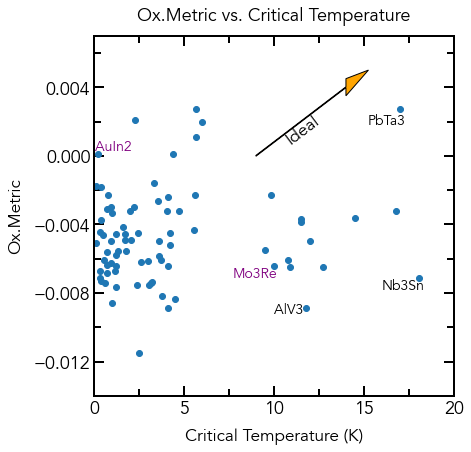

In [282]:
fig = plt.figure(figsize=(5, 5),)
ax = fig.add_axes([0, 0, 1, 1])

ax.set_xlim(0, 20)
ax.set_ylim(-0.014, 0.007)



plt.plot(Tc,pred_metrics,'o')



ax.set_xlabel('Critical Temperature (K)', labelpad=10,fontsize = 17)
ax.set_ylabel('Ox.Metric', labelpad=10,fontsize = 17)
ax.set_title('Ox.Metric vs. Critical Temperature', pad=15, fontsize = 18)


ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')

ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(5))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(2.5))
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.004))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.002))

plt.text(10.0, -0.0092, "AlV3", fontsize=14)
#1.0074074268341064
plt.text(16.008, -0.0078, "Nb3Sn", fontsize=14)
#plt.text(13.2, -0.0070, "Mo3Os", fontsize=12)

plt.arrow(9,0,5,0.004, width = .00005, head_width = .001, head_length= 1.25, facecolor = 'orange')

plt.text(10.5, .0007, "Ideal", fontsize=17, fontstyle = 'italic', rotation = 37)

#plt.text(2.9, -0.0113, "Be22Mo", fontsize=12)

plt.text(15.2, .0018, "PbTa3", fontsize=14)

plt.text(.05, .00033, "AuIn2", fontsize=14,color = 'purple')

#plt.text(1.8, .00229, "AgTh2", fontsize=12)

#plt.text(5.3, .0030, "BaBi3", fontsize=12)

plt.text(7.7, -.0071, "Mo3Re", fontsize=14, color = 'purple')


image_format = 'jpg' # e.g .png, .svg, etc.
image_name = 'plt_4.jpg'
#fig = plt.figure(figsize=(8,8))

fig.savefig(image_name, format=image_format, dpi=600)



## 

In [167]:
match_list = [[['AlNb3', 12], 1.004945158958435], [['AlV3', 11.8], 1.0088893175125122], [['AuNb3', 11.5], 1.0036711692810059], [['GaNb3', 14.5], 1.0036357641220093], [['GaV3', 16.8], 1.0032191276550293], [['InLa3', 9.83], 1.0022821426391602], [['Mo3Os', 12.7], 1.0065081119537354], [['Mo3Re', 10], 1.006417989730835], [['MoRu', 9.5], 1.0055214166641235], [['Nb3Pt', 10.9], 1.0065081119537354], [['Nb3Sn', 18.05], 1.0071139335632324], [['PbTa3', 17], 0.9972808361053467], [['RhZr2', 10.8], 1.006104588508606], [['AgIn2', 2.4], 1.007535457611084], [['AgLa', 0.94], 1.0029979944229126], [['AgTh2', 2.26], 0.997937023639679], [['AgY', 0.33], 1.0067015886306763], [['AlAu4', 0.4], 1.007295846939087], [['Al2Au', 0.1], 1.0050603151321411], [['AlLa3', 5.57], 1.0043272972106934], [['Al2La', 3.23], 1.0073753595352173], [['Al2Lu', 1.02], 1.008583426475525], [['AlMo3', 0.58], 1.006069302558899], [['Al3Nb', 0.64], 1.0074074268341064], [['AlOs', 0.39], 1.0018054246902466], [['Al2Pt', 0.48], 1.0046216249465942], [['Al5Re24', 3.35], 1.0015705823898315], [['Al2Sc', 1.02], 1.003318190574646], [['AlTh2', 0.1], 1.001771330833435], [['Al3Th', 0.75], 1.0031272172927856], [['Al2Y', 0.35], 1.0071139335632324], [['Al3Yb', 0.94], 1.0062474012374878], [['AlZr3', 0.73], 1.0068477392196655], [['Au5Ba', 0.4], 1.003753662109375], [['AuBe', 2.64], 1.0062223672866821], [['Au2Bi', 1.8], 1.0055570602416992], [['Au5Ca', 0.34], 1.004464030265808], [['AuGa2', 1.6], 1.0041329860687256], [['AuGa', 1.2], 1.0057592391967773], [['AuIn2', 0.2], 0.9998885989189148], [['AuNb3', 1.2], 1.0038871765136719], [['AuPb2', 3.15], 1.0074074268341064], [['AuPb3', 4.4], 0.9998885989189148], [['Au2Pb', 1.18], 1.006714940071106], [['AuSn', 1.25], 1.0045825242996216], [['Au5Sn', 0.7], 1.0056073665618896], [['AuTh2', 3.08], 1.007554054260254], [['AuV3', 0.74], 1.00637948513031], [['AuZn3', 1.21], 1.006412148475647], [['AuZr3', 0.92], 1.004945158958435], [['BaBi3', 5.69], 0.9972808361053467], [['BaRh2', 6], 0.9980019927024841], [['Be22Mo', 2.51], 1.0115225315093994], [['Be22W', 4.12], 1.0088893175125122], [['Be13W', 4.1], 1.006417989730835], [['Bi3Ca', 2], 1.0032232999801636], [['Bi2Cs', 4.75], 1.0032072067260742], [['BiCu', 1.33], 1.0055570602416992], [['Bi3In5', 4.1], 1.0024237632751465], [['BiIn2', 5.65], 0.9988980889320374], [['Bi2Ir', 1.7], 1.0045886039733887], [['BiK', 3.6], 1.004945158958435], [['Bi2K', 3.58], 1.002630591392517], [['BiLi', 2.47], 1.0045053958892822], [['Bi3Mo', 3], 1.006131649017334], [['BiNa', 2.25], 1.0029617547988892], [['BiNb3', 4.5], 1.0083800554275513], [['BiNi', 4.25], 1.0052164793014526], [['Bi3Ni', 4.06], 1.0032072067260742], [['BiPd', 3.7], 1.006069302558899], [['Bi2Pd', 1.7], 1.0049371719360352], [['BiPt', 1.21], 1.0076494216918945], [['Bi2Rb', 4.25], 1.0045053958892822], [['BiRh', 2.06], 1.0049371719360352], [['Bi3Sn', 3.6], 1.0058364868164062], [['Bi3Sr', 5.62], 1.0022821426391602], [['BiSn', 3.8], 1.0081874132156372], [['Bi3Zn', 0.8], 1.0022794008255005]]


In [168]:
m = []
for item in match_list:
    mm = abs(1- item[1])
    m.append(mm)
    
m.sort()
print(m)

[0.00011140108108520508, 0.00011140108108520508, 0.0011019110679626465, 0.001570582389831543, 0.0017713308334350586, 0.001805424690246582, 0.001998007297515869, 0.002062976360321045, 0.0022794008255004883, 0.0022821426391601562, 0.0022821426391601562, 0.0024237632751464844, 0.00263059139251709, 0.0027191638946533203, 0.0027191638946533203, 0.00296175479888916, 0.0029979944229125977, 0.0031272172927856445, 0.0032072067260742188, 0.0032072067260742188, 0.003219127655029297, 0.0032232999801635742, 0.003318190574645996, 0.0036357641220092773, 0.0036711692810058594, 0.003753662109375, 0.003887176513671875, 0.004132986068725586, 0.004327297210693359, 0.0044640302658081055, 0.0045053958892822266, 0.0045053958892822266, 0.004582524299621582, 0.004588603973388672, 0.004621624946594238, 0.004937171936035156, 0.004937171936035156, 0.004945158958435059, 0.004945158958435059, 0.004945158958435059, 0.005060315132141113, 0.005216479301452637, 0.005521416664123535, 0.005557060241699219, 0.005557060241

In [39]:
highest_ten = [[[['Mo3Re', 10], 1.006417989730835]], [[['RhZr2', 10.8], 1.006104588508606]], [[['Nb3Pt', 10.9], 1.0065081119537354]], [[['AuNb3', 11.5], 1.0036711692810059]], [[['AlV3', 11.8], 1.0088893175125122]], [[['AlNb3', 12], 1.004945158958435]], [[['Mo3Os', 12.7], 1.0065081119537354]], [[['GaNb3', 14.5], 1.0036357641220093]], [[['GaV3', 16.8], 1.0032191276550293]], [[['PbTa3', 17], 0.9972808361053467]], [[['Nb3Sn', 18.05], 1.0071139335632324]]]
for item in highest_ten:
    print(item)

[[['Mo3Re', 10], 1.006417989730835]]
[[['RhZr2', 10.8], 1.006104588508606]]
[[['Nb3Pt', 10.9], 1.0065081119537354]]
[[['AuNb3', 11.5], 1.0036711692810059]]
[[['AlV3', 11.8], 1.0088893175125122]]
[[['AlNb3', 12], 1.004945158958435]]
[[['Mo3Os', 12.7], 1.0065081119537354]]
[[['GaNb3', 14.5], 1.0036357641220093]]
[[['GaV3', 16.8], 1.0032191276550293]]
[[['PbTa3', 17], 0.9972808361053467]]
[[['Nb3Sn', 18.05], 1.0071139335632324]]


In [40]:
metric_list = [1.004945158958435, 1.0088893175125122, 1.0036711692810059, 1.0036357641220093, 1.0032191276550293, 1.0022821426391602, 1.0065081119537354, 1.006417989730835, 1.0055214166641235, 1.0065081119537354, 1.0071139335632324, 0.9972808361053467, 1.006104588508606, 1.007535457611084, 1.0029979944229126, 0.997937023639679, 1.0067015886306763, 1.007295846939087, 1.0050603151321411, 1.0043272972106934, 1.0073753595352173, 1.008583426475525, 1.006069302558899, 1.0074074268341064, 1.0018054246902466, 1.0046216249465942, 1.0015705823898315, 1.003318190574646, 1.001771330833435, 1.0031272172927856, 1.0071139335632324, 1.0062474012374878, 1.0068477392196655, 1.003753662109375, 1.0062223672866821, 1.0055570602416992, 1.004464030265808, 1.0041329860687256, 1.0057592391967773, 0.9998885989189148, 1.0038871765136719, 1.0074074268341064, 0.9998885989189148, 1.006714940071106, 1.0045825242996216, 1.0056073665618896, 1.007554054260254, 1.00637948513031, 1.006412148475647, 1.004945158958435, 0.9972808361053467, 0.9980019927024841, 1.0115225315093994, 1.0088893175125122, 1.006417989730835, 1.0032232999801636, 1.0032072067260742, 1.0055570602416992, 1.0024237632751465, 0.9988980889320374, 1.0045886039733887, 1.004945158958435, 1.002630591392517, 1.0045053958892822, 1.006131649017334, 1.0029617547988892, 1.0083800554275513, 1.0052164793014526, 1.0032072067260742, 1.006069302558899, 1.0049371719360352, 1.0076494216918945, 1.0045053958892822, 1.0049371719360352, 1.0058364868164062, 1.0022821426391602, 1.0081874132156372, 1.0022794008255005]


In [41]:
counter = 0
match_list = []
for item in bbb:
    b = []
    b.append(item)
    b.append(metric_list[counter])
    match_list.append(b)
    counter+=1

            
            

In [42]:
match_list = [[['AlNb3', 12], 1.004945158958435], [['AlV3', 11.8], 1.0088893175125122], [['AuNb3', 11.5], 1.0036711692810059], [['GaNb3', 14.5], 1.0036357641220093], [['GaV3', 16.8], 1.0032191276550293], [['InLa3', 9.83], 1.0022821426391602], [['Mo3Os', 12.7], 1.0065081119537354], [['Mo3Re', 10], 1.006417989730835], [['MoRu', 9.5], 1.0055214166641235], [['Nb3Pt', 10.9], 1.0065081119537354], [['Nb3Sn', 18.05], 1.0071139335632324], [['PbTa3', 17], 0.9972808361053467], [['RhZr2', 10.8], 1.006104588508606], [['AgIn2', 2.4], 1.007535457611084], [['AgLa', 0.94], 1.0029979944229126], [['AgTh2', 2.26], 0.997937023639679], [['AgY', 0.33], 1.0067015886306763], [['AlAu4', 0.4], 1.007295846939087], [['Al2Au', 0.1], 1.0050603151321411], [['AlLa3', 5.57], 1.0043272972106934], [['Al2La', 3.23], 1.0073753595352173], [['Al2Lu', 1.02], 1.008583426475525], [['AlMo3', 0.58], 1.006069302558899], [['Al3Nb', 0.64], 1.0074074268341064], [['AlOs', 0.39], 1.0018054246902466], [['Al2Pt', 0.48], 1.0046216249465942], [['Al5Re24', 3.35], 1.0015705823898315], [['Al2Sc', 1.02], 1.003318190574646], [['AlTh2', 0.1], 1.001771330833435], [['Al3Th', 0.75], 1.0031272172927856], [['Al2Y', 0.35], 1.0071139335632324], [['Al3Yb', 0.94], 1.0062474012374878], [['AlZr3', 0.73], 1.0068477392196655], [['Au5Ba', 0.4], 1.003753662109375], [['AuBe', 2.64], 1.0062223672866821], [['Au2Bi', 1.8], 1.0055570602416992], [['Au5Ca', 0.34], 1.004464030265808], [['AuGa2', 1.6], 1.0041329860687256], [['AuGa', 1.2], 1.0057592391967773], [['AuIn2', 0.2], 0.9998885989189148], [['AuNb3', 1.2], 1.0038871765136719], [['AuPb2', 3.15], 1.0074074268341064], [['AuPb3', 4.4], 0.9998885989189148], [['Au2Pb', 1.18], 1.006714940071106], [['AuSn', 1.25], 1.0045825242996216], [['Au5Sn', 0.7], 1.0056073665618896], [['AuTh2', 3.08], 1.007554054260254], [['AuV3', 0.74], 1.00637948513031], [['AuZn3', 1.21], 1.006412148475647], [['AuZr3', 0.92], 1.004945158958435], [['BaBi3', 5.69], 0.9972808361053467], [['BaRh2', 6], 0.9980019927024841], [['Be22Mo', 2.51], 1.0115225315093994], [['Be22W', 4.12], 1.0088893175125122], [['Be13W', 4.1], 1.006417989730835], [['Bi3Ca', 2], 1.0032232999801636], [['Bi2Cs', 4.75], 1.0032072067260742], [['BiCu', 1.33], 1.0055570602416992], [['Bi3In5', 4.1], 1.0024237632751465], [['BiIn2', 5.65], 0.9988980889320374], [['Bi2Ir', 1.7], 1.0045886039733887], [['BiK', 3.6], 1.004945158958435], [['Bi2K', 3.58], 1.002630591392517], [['BiLi', 2.47], 1.0045053958892822], [['Bi3Mo', 3], 1.006131649017334], [['BiNa', 2.25], 1.0029617547988892], [['BiNb3', 4.5], 1.0083800554275513], [['BiNi', 4.25], 1.0052164793014526], [['Bi3Ni', 4.06], 1.0032072067260742], [['BiPd', 3.7], 1.006069302558899], [['Bi2Pd', 1.7], 1.0049371719360352], [['BiPt', 1.21], 1.0076494216918945], [['Bi2Rb', 4.25], 1.0045053958892822], [['BiRh', 2.06], 1.0049371719360352], [['Bi3Sn', 3.6], 1.0058364868164062], [['Bi3Sr', 5.62], 1.0022821426391602], [['BiSn', 3.8], 1.0081874132156372], [['Bi3Zn', 0.8], 1.0022794008255005]]
#VERY IMPORTANT

In [55]:
print(match_list)

[[['AlNb3', 12], 1.004945158958435], [['AlV3', 11.8], 1.0088893175125122], [['AuNb3', 11.5], 1.0036711692810059], [['GaNb3', 14.5], 1.0036357641220093], [['GaV3', 16.8], 1.0032191276550293], [['InLa3', 9.83], 1.0022821426391602], [['Mo3Os', 12.7], 1.0065081119537354], [['Mo3Re', 10], 1.006417989730835], [['MoRu', 9.5], 1.0055214166641235], [['Nb3Pt', 10.9], 1.0065081119537354], [['Nb3Sn', 18.05], 1.0071139335632324], [['PbTa3', 17], 0.9972808361053467], [['RhZr2', 10.8], 1.006104588508606], [['AgIn2', 2.4], 1.007535457611084], [['AgLa', 0.94], 1.0029979944229126], [['AgTh2', 2.26], 0.997937023639679], [['AgY', 0.33], 1.0067015886306763], [['AlAu4', 0.4], 1.007295846939087], [['Al2Au', 0.1], 1.0050603151321411], [['AlLa3', 5.57], 1.0043272972106934], [['Al2La', 3.23], 1.0073753595352173], [['Al2Lu', 1.02], 1.008583426475525], [['AlMo3', 0.58], 1.006069302558899], [['Al3Nb', 0.64], 1.0074074268341064], [['AlOs', 0.39], 1.0018054246902466], [['Al2Pt', 0.48], 1.0046216249465942], [['Al5Re2

In [43]:
figure_table = []
for item in match_list:
    l = []
    l.append(item[0][0])
    l.append(item[0][1])
    l.append(item[1])
    figure_table.append(l)

In [44]:
figure_table = np.array(figure_table)

In [45]:
pd.set_option('display.max_rows', 77) 
pd.DataFrame(figure_table, columns=['Alloy','Tc','Metric Value'])


,Alloy,Tc,Metric Value
0,AlNb3,12,1.004945158958435
1,AlV3,11.8,1.0088893175125122
2,AuNb3,11.5,1.0036711692810059
3,GaNb3,14.5,1.0036357641220093
4,GaV3,16.8,1.0032191276550293
...,...,...,...
73,BiRh,2.06,1.0049371719360352
74,Bi3Sn,3.6,1.0058364868164062
75,Bi3Sr,5.62,1.0022821426391602
76,BiSn,3.8,1.0081874132156372


In [46]:
metric_list = []
for item in match_list:
    m = []
    m.append(item[0][0])
    m.append(item[1])
    metric_list.append(m)

In [47]:
n = []
for item in metric_list:
    n.append(item[1])
n.sort()


In [48]:
lowest_ten = []
for item in range(11):
    lowest_ten.append(n[item])
highest_ten = []
for item in range(len(n)-11,len(n)):
    highest_ten.append(n[item])

In [49]:
for item in lowest_tenn:
    print(item)

NameError: name 'lowest_tenn' is not defined

In [50]:
for item in highest_tenn:
    print(item)

NameError: name 'highest_tenn' is not defined

In [51]:
l = []
for item in match_list: 
    d = []
    b = math.sqrt((item[0][1])**2 + (item[1])**2)
    d.append(item)
    d.append(b)
    l.append(d)



In [52]:
print(l[0][1])

12.042006260275485


In [53]:
d = []
for item in l:
    d.append(item[1])
    

In [54]:
d.sort()

In [33]:
print(d)

[1.006750117596115, 1.010022889371087, 1.0196946652052419, 1.059409311150099, 1.0604470699180748, 1.0661981406742402, 1.075041445219116, 1.0805190485123257, 1.083810372371815, 1.1134022675162538, 1.1612818097048405, 1.1935115096388955, 1.2252535148627564, 1.2436407720767888, 1.2491595847173202, 1.2525031792668502, 1.2824055510325603, 1.3624664298668039, 1.3746290324361643, 1.3770017547182711, 1.4307506391883882, 1.4344478129793048, 1.5510883181051847, 1.5645412948109079, 1.5657431613229804, 1.5738377974236633, 1.5746292760634197, 1.6036477319312368, 1.6673466950223426, 1.8889899559582883, 1.9746387677834145, 1.9748161229691223, 2.0618304977378545, 2.2375113384345315, 2.292051203515924, 2.4634188197684264, 2.470521868583806, 2.602907547021902, 2.6664454035983343, 2.706155544633601, 2.8252581213807733, 3.1642220047200134, 3.2406118515268494, 3.307169442837865, 3.3834457458334852, 3.4965187875240575, 3.7177504088892395, 3.737634916964737, 3.7378746686066364, 3.8343415916622963, 3.93146815

In [34]:
j = []

for item in d:
    for i in l:
        if i[1] == item:
            j.append(i)

In [39]:
lowest_ten = []
for item in range(11):
    lowest_ten.append(j[item])

In [40]:
lowest_ten = [[[['AlTh2', 0.1], 1.001771330833435], 1.006750117596115], [[['Al2Au', 0.1], 1.0050603151321411], 1.010022889371087], [[['AuIn2', 0.2], 0.9998885989189148], 1.0196946652052419], [[['AgY', 0.33], 1.0067015886306763], 1.059409311150099], [[['Au5Ca', 0.34], 1.004464030265808], 1.0604470699180748], [[['Al2Y', 0.35], 1.0071139335632324], 1.0661981406742402], [[['AlOs', 0.39], 1.0018054246902466], 1.075041445219116], [[['Au5Ba', 0.4], 1.003753662109375], 1.0805190485123257], [[['AlAu4', 0.4], 1.007295846939087], 1.083810372371815], [[['Al2Pt', 0.48], 1.0046216249465942], 1.1134022675162538], [[['AlMo3', 0.58], 1.006069302558899], 1.1612818097048405]]


[[[['AlTh2', 0.1], 1.001771330833435], 1.006750117596115], [[['Al2Au', 0.1], 1.0050603151321411], 1.010022889371087], [[['AuIn2', 0.2], 0.9998885989189148], 1.0196946652052419], [[['AgY', 0.33], 1.0067015886306763], 1.059409311150099], [[['Au5Ca', 0.34], 1.004464030265808], 1.0604470699180748], [[['Al2Y', 0.35], 1.0071139335632324], 1.0661981406742402], [[['AlOs', 0.39], 1.0018054246902466], 1.075041445219116], [[['Au5Ba', 0.4], 1.003753662109375], 1.0805190485123257], [[['AlAu4', 0.4], 1.007295846939087], 1.083810372371815], [[['Al2Pt', 0.48], 1.0046216249465942], 1.1134022675162538], [[['AlMo3', 0.58], 1.006069302558899], 1.1612818097048405]]


In [41]:
highest_ten = []
for item in range(len(j)-11,len(j)):
    highest_ten.append(j[item])

In [42]:
highest_ten =  [[[['Mo3Re', 10], 1.006417989730835], 10.05051626385699], [[['RhZr2', 10.8], 1.006104588508606], 10.846762025739206], [[['Nb3Pt', 10.9], 1.0065081119537354], 10.946371936830426], [[['AuNb3', 11.5], 1.0036711692810059], 11.543714991979224], [[['AlV3', 11.8], 1.0088893175125122], 11.843051028134214], [[['AlNb3', 12], 1.004945158958435], 12.042006260275485], [[['Mo3Os', 12.7], 1.0065081119537354], 12.739821764036915], [[['GaNb3', 14.5], 1.0036357641220093], 14.534692454504318], [[['GaV3', 16.8], 1.0032191276550293], 16.82992717209712], [[['PbTa3', 17], 0.9972808361053467], 17.029226907468907], [[['Nb3Sn', 18.05], 1.0071139335632324], 18.078074523443508]]

[[[['Mo3Re', 10], 1.006417989730835], 10.05051626385699], [[['RhZr2', 10.8], 1.006104588508606], 10.846762025739206], [[['Nb3Pt', 10.9], 1.0065081119537354], 10.946371936830426], [[['AuNb3', 11.5], 1.0036711692810059], 11.543714991979224], [[['AlV3', 11.8], 1.0088893175125122], 11.843051028134214], [[['AlNb3', 12], 1.004945158958435], 12.042006260275485], [[['Mo3Os', 12.7], 1.0065081119537354], 12.739821764036915], [[['GaNb3', 14.5], 1.0036357641220093], 14.534692454504318], [[['GaV3', 16.8], 1.0032191276550293], 16.82992717209712], [[['PbTa3', 17], 0.9972808361053467], 17.029226907468907], [[['Nb3Sn', 18.05], 1.0071139335632324], 18.078074523443508]]


In [43]:
for item in highest_ten:
    item.pop(1)
for item in lowest_ten:
    item.pop(1)

In [349]:
highest_ten = [[[['Mo3Re', 10], 1.006417989730835]], [[['RhZr2', 10.8], 1.006104588508606]], [[['Nb3Pt', 10.9], 1.0065081119537354]], [[['AuNb3', 11.5], 1.0036711692810059]], [[['AlV3', 11.8], 1.0088893175125122]], [[['AlNb3', 12], 1.004945158958435]], [[['Mo3Os', 12.7], 1.0065081119537354]], [[['GaNb3', 14.5], 1.0036357641220093]], [[['GaV3', 16.8], 1.0032191276550293]], [[['PbTa3', 17], 0.9972808361053467]], [[['Nb3Sn', 18.05], 1.0071139335632324]]]
for item in highest_ten:
    print(item)

In [350]:
for item in highest_ten:
    print(item)

[[['Mo3Re', 10], 1.006417989730835]]
[[['RhZr2', 10.8], 1.006104588508606]]
[[['Nb3Pt', 10.9], 1.0065081119537354]]
[[['AuNb3', 11.5], 1.0036711692810059]]
[[['AlV3', 11.8], 1.0088893175125122]]
[[['AlNb3', 12], 1.004945158958435]]
[[['Mo3Os', 12.7], 1.0065081119537354]]
[[['GaNb3', 14.5], 1.0036357641220093]]
[[['GaV3', 16.8], 1.0032191276550293]]
[[['PbTa3', 17], 0.9972808361053467]]
[[['Nb3Sn', 18.05], 1.0071139335632324]]


In [46]:
lowest_ten = [[[['AlTh2', 0.1], 1.001771330833435]], [[['Al2Au', 0.1], 1.0050603151321411]], [[['AuIn2', 0.2], 0.9998885989189148]], [[['AgY', 0.33], 1.0067015886306763]], [[['Au5Ca', 0.34], 1.004464030265808]], [[['Al2Y', 0.35], 1.0071139335632324]], [[['AlOs', 0.39], 1.0018054246902466]], [[['Au5Ba', 0.4], 1.003753662109375]], [[['AlAu4', 0.4], 1.007295846939087]], [[['Al2Pt', 0.48], 1.0046216249465942]], [[['AlMo3', 0.58], 1.006069302558899]]]


In [49]:
for item in lowest_ten:
    print(item)

[[['AlTh2', 0.1], 1.001771330833435]]
[[['Al2Au', 0.1], 1.0050603151321411]]
[[['AuIn2', 0.2], 0.9998885989189148]]
[[['AgY', 0.33], 1.0067015886306763]]
[[['Au5Ca', 0.34], 1.004464030265808]]
[[['Al2Y', 0.35], 1.0071139335632324]]
[[['AlOs', 0.39], 1.0018054246902466]]
[[['Au5Ba', 0.4], 1.003753662109375]]
[[['AlAu4', 0.4], 1.007295846939087]]
[[['Al2Pt', 0.48], 1.0046216249465942]]
[[['AlMo3', 0.58], 1.006069302558899]]
